In [380]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Handle Missing Values

In [382]:
df = pd.read_csv('/content/drive/MyDrive/Colab/T5Bootcamp/DA/Datasets/Task (1) Dataset.csv')

In [383]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [385]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [386]:
df.shape

(12316, 32)

In [387]:
df.Educational_level.unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [388]:
df[df.Educational_level == 'Unknown'].shape[0]

100

In [389]:
df.Educational_level.value_counts()

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

In [390]:
df.Educational_level.fillna('Unknown', inplace=True)

In [391]:
df.groupby('Age_band_of_driver')['Educational_level'].value_counts()

Age_band_of_driver  Educational_level 
18-30               Junior high school    2615
                    Elementary school      736
                    High school            377
                    Unknown                304
                    Above high school      150
                    Writing & reading       72
                    Illiterate              17
31-50               Junior high school    2517
                    Elementary school      740
                    High school            379
                    Unknown                274
                    Above high school      113
                    Writing & reading       53
                    Illiterate              11
Over 51             Junior high school     974
                    Elementary school      281
                    High school            151
                    Unknown                114
                    Above high school       44
                    Writing & reading       14
                    I

In [392]:
df.groupby('Educational_level')['Age_band_of_driver'].value_counts()

Educational_level   Age_band_of_driver
Above high school   18-30                  150
                    31-50                  113
                    Over 51                 44
                    Unknown                 34
                    Under 18                21
Elementary school   31-50                  740
                    18-30                  736
                    Over 51                281
                    Unknown                261
                    Under 18               145
High school         31-50                  379
                    18-30                  377
                    Over 51                151
                    Unknown                135
                    Under 18                68
Illiterate          18-30                   17
                    31-50                   11
                    Unknown                  8
                    Over 51                  7
                    Under 18                 2
Junior high school  1

In [393]:
df.Educational_level.mode()

0    Junior high school
Name: Educational_level, dtype: object

In [394]:
df.Educational_level.replace('Unknown', df.Educational_level.mode()[0], inplace=True)

In [395]:
df.Educational_level.unique()

array(['Above high school', 'Junior high school', 'Elementary school',
       'High school', 'Illiterate', 'Writing & reading'], dtype=object)

In [396]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [397]:
df.Vehicle_driver_relation.unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [398]:
df.Vehicle_driver_relation.value_counts()

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

In [399]:
df.Vehicle_driver_relation.fillna(df.Vehicle_driver_relation.mode()[0], inplace=True)

In [400]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [401]:
df.Vehicle_driver_relation.unique()

array(['Employee', 'Unknown', 'Owner', 'Other'], dtype=object)

In [402]:
df.Driving_experience.unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [403]:
df.Driving_experience.fillna('unknown',inplace=True)

In [404]:
df.Driving_experience.unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'unknown', 'No Licence',
       'Below 1yr'], dtype=object)

In [405]:
df.Driving_experience.value_counts()

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
unknown        862
No Licence     118
Name: count, dtype: int64

In [406]:
df.Driving_experience.replace('unknown', df.Driving_experience.mode()[0], inplace=True)

In [407]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [408]:
df.Type_of_vehicle.unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [409]:
df.Type_of_vehicle.value_counts()

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [410]:
df.Type_of_vehicle.fillna(df.Type_of_vehicle.mode()[0], inplace=True)

In [411]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [412]:
df.Owner_of_vehicle.unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

In [413]:
df.Owner_of_vehicle.value_counts()

Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64

In [414]:
df.Owner_of_vehicle.fillna(df.Owner_of_vehicle.mode()[0], inplace=True)

In [415]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [416]:
df.Service_year_of_vehicle.unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [417]:
df.Service_year_of_vehicle.value_counts()

Service_year_of_vehicle
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64

In [418]:
df.Service_year_of_vehicle.fillna('Unknown', inplace=True)

In [419]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle           0
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [420]:
df.Service_year_of_vehicle.value_counts()

Service_year_of_vehicle
Unknown       6811
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64

In [421]:
df.drop('Service_year_of_vehicle',inplace=True, axis=1)

In [422]:
df.shape

(12316, 31)

In [423]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [424]:
df.Defect_of_vehicle.unique()

array(['No defect', nan, '7', '5'], dtype=object)

In [425]:
df.Defect_of_vehicle.value_counts()

Defect_of_vehicle
No defect    7777
7              76
5              36
Name: count, dtype: int64

In [426]:
df.drop('Defect_of_vehicle',inplace=True, axis=1)

In [427]:
df.shape

(12316, 30)

In [428]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement         

In [429]:
df.Area_accident_occured.unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Unknown', 'Rural village areas',
       ' Outside rural areas', ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

In [430]:
df.Area_accident_occured.value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [431]:
df.Area_accident_occured.fillna('Unknown', inplace=True)

In [432]:
df.Area_accident_occured.value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
Unknown                             261
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [433]:
df.Area_accident_occured.mode()

0    Other
Name: Area_accident_occured, dtype: object

In [434]:
df.Area_accident_occured.replace('Unknown','Office areas', inplace=True)

In [435]:
df.Area_accident_occured.value_counts()

Area_accident_occured
Other                              3819
Office areas                       3712
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [436]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured             0
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement         

In [437]:
df.Lanes_or_Medians.unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [438]:
df.Lanes_or_Medians.value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64

In [439]:
df.Lanes_or_Medians.fillna('Unknown', inplace=True)

In [440]:
df.Lanes_or_Medians.value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Unknown                                              442
Two-way (divided with solid lines road marking)      142
Name: count, dtype: int64

In [441]:
df.Lanes_or_Medians.replace('Unknown', df.Lanes_or_Medians.mode()[0], inplace=True)

In [442]:
df.Lanes_or_Medians.value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4853
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Name: count, dtype: int64

In [443]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement         

In [444]:
df.Road_allignment.unique()

array(['Tangent road with flat terrain', nan,
       'Tangent road with mild grade and flat terrain', 'Escarpments',
       'Tangent road with rolling terrain', 'Gentle horizontal curve',
       'Tangent road with mountainous terrain and',
       'Steep grade downward with mountainous terrain',
       'Sharp reverse curve',
       'Steep grade upward with mountainous terrain'], dtype=object)

In [445]:
df.Road_allignment.value_counts()

Road_allignment
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64

In [446]:
df.Road_allignment.fillna(df.Road_allignment.mode()[0], inplace=True)

In [447]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement         

In [448]:
df.Types_of_Junction.unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [449]:
df.Types_of_Junction.value_counts()

Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

In [450]:
df.Types_of_Junction.fillna(df.Types_of_Junction.mode()[0], inplace=True)

In [451]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement         

In [452]:
df.Road_surface_type.unique()

array(['Asphalt roads', 'Earth roads', nan,
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype=object)

In [453]:
df.Road_surface_type.value_counts()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64

In [454]:
df.Road_surface_type.fillna(df.Road_surface_type.mode()[0], inplace=True)

In [455]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement         

In [456]:
df.Type_of_collision.unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', 'Unknown', nan],
      dtype=object)

In [457]:
df.Type_of_collision.value_counts()

Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [458]:
df.Type_of_collision.fillna(df.Type_of_collision.mode()[0], inplace=True)

In [459]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement         

In [460]:
df.Vehicle_movement.unique()

array(['Going straight', 'U-Turn', 'Moving Backward', 'Turnover',
       'Waiting to go', 'Getting off', 'Reversing', 'Unknown', 'Parked',
       'Stopping', 'Overtaking', 'Other', 'Entering a junction', nan],
      dtype=object)

In [461]:
df.Vehicle_movement.value_counts()

Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64

In [462]:
df.Vehicle_movement.fillna(df.Vehicle_movement.mode()[0], inplace=True)

In [463]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                  0
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement         

In [464]:
df.Work_of_casuality.unique()

array([nan, 'Driver', 'Other', 'Unemployed', 'Employee', 'Self-employed',
       'Student', 'Unknown'], dtype=object)

In [465]:
df.Work_of_casuality.value_counts()

Work_of_casuality
Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: count, dtype: int64

In [466]:
df.drop('Work_of_casuality',inplace=True, axis=1)

In [467]:
df.shape

(12316, 29)

In [468]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                  0
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident           

In [469]:
df.Fitness_of_casuality.unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind', 'NormalNormal'],
      dtype=object)

In [470]:
df.Fitness_of_casuality.value_counts()

Fitness_of_casuality
Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: count, dtype: int64

In [471]:
df.Fitness_of_casuality.replace('NormalNormal', 'Normal', inplace=True)

In [472]:
df.Fitness_of_casuality.fillna('na', inplace=True)

In [473]:
df.Fitness_of_casuality.value_counts()

Fitness_of_casuality
Normal    9627
na        2635
Deaf        18
Other       18
Blind       18
Name: count, dtype: int64

In [474]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

### Correct any inconsistent data entries.

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

In [476]:
for col in df.columns:
  print(col, df[col].unique())
  print('')

Time ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

Day_of_week ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

Age_band_of_driver ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

Sex_of_driver ['Male' 'Female' 'Unknown']

Educational_level ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']

Vehicle_driver_relation ['Employee' 'Unknown' 'Owner' 'Other']

Driving_experience ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']

Type_of_vehicle ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']

Owner_of_vehicle ['Owner' 'Governmental' 'Organization' 'Other']

Area_accident_occured ['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other' ' C

In [477]:
df.Age_band_of_driver.unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [478]:
df.Age_band_of_driver.value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [479]:
df.Age_band_of_driver.replace('Unknown', '18-30', inplace=True)

In [480]:
df.Age_band_of_driver.value_counts()

Age_band_of_driver
18-30       5819
31-50       4087
Over 51     1585
Under 18     825
Name: count, dtype: int64

In [481]:
df.Sex_of_driver.value_counts()

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

In [482]:
df.Sex_of_driver.replace('Unknown', 'Male', inplace=True)

In [483]:
df.Sex_of_driver.value_counts()

Sex_of_driver
Male      11615
Female      701
Name: count, dtype: int64

In [484]:
df.Vehicle_driver_relation.value_counts()

Vehicle_driver_relation
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: count, dtype: int64

In [485]:
df.Vehicle_driver_relation.replace('Unknown', 'Employee', inplace=True)

In [486]:
df.Vehicle_driver_relation.value_counts()

Vehicle_driver_relation
Employee    10220
Owner        1973
Other         123
Name: count, dtype: int64

In [487]:
df.Types_of_Junction.value_counts()

Types_of_Junction
Y Shape        5430
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

In [488]:
df.Types_of_Junction.replace('Unknown', df.Types_of_Junction.mode()[0], inplace=True)

In [489]:
df.Types_of_Junction.value_counts()

Types_of_Junction
Y Shape        5621
No junction    3837
Crossing       2177
Other           445
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

In [490]:
df.Weather_conditions.value_counts()

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

In [491]:
df.Weather_conditions.replace('Unknown', df.Weather_conditions.mode()[0], inplace=True)

In [492]:
df.Weather_conditions.value_counts()

Weather_conditions
Normal               10355
Raining               1331
Other                  296
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

In [493]:
df.Type_of_collision.value_counts()

Type_of_collision
Vehicle with vehicle collision             8929
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [494]:
df.Type_of_collision.replace('Unknown', df.Type_of_collision.mode()[0], inplace=True)

In [495]:
df.Type_of_collision.value_counts()

Type_of_collision
Vehicle with vehicle collision             8943
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
With Train                                    9
Name: count, dtype: int64

In [496]:
for col in df.columns:
  print(col, df[col].unique())
  print('')

Time ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

Day_of_week ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

Age_band_of_driver ['18-30' '31-50' 'Under 18' 'Over 51']

Sex_of_driver ['Male' 'Female']

Educational_level ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']

Vehicle_driver_relation ['Employee' 'Owner' 'Other']

Driving_experience ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']

Type_of_vehicle ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']

Owner_of_vehicle ['Owner' 'Governmental' 'Organization' 'Other']

Area_accident_occured ['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other' ' Church areas' '  Market areas'


In [497]:
df.Casualty_class.value_counts()

Casualty_class
Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: count, dtype: int64

In [498]:
df[df.Casualty_class=='na']

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,Going straight,na,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,Going straight,na,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,2,Going straight,na,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,...,1,U-Turn,na,na,na,na,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
10,14:40:00,Saturday,18-30,Male,Above high school,Owner,1-2yr,Public (13?45 seats),Owner,Residential areas,...,1,Turnover,na,na,na,na,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,17:10:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Governmental,Outside rural areas,...,1,Moving Backward,na,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
12308,17:10:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,Other,na,na,na,na,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,1,Going straight,na,na,na,na,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,18-30,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,1,Other,na,na,na,na,Normal,Not a Pedestrian,No distancing,Slight Injury


In [499]:
df.Cause_of_accident.value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: count, dtype: int64

In [500]:
df.Cause_of_accident.replace('Unknown', df.Cause_of_accident.mode()[0], inplace=True)

In [501]:
df.Cause_of_accident.value_counts()

Cause_of_accident
No distancing                           2288
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Improper parking                          25
Name: count, dtype: int64

In [502]:
df.Pedestrian_movement.value_counts()

Pedestrian_movement
Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                             

In [503]:
df.Pedestrian_movement.replace('Unknown or other', df.Pedestrian_movement.mode()[0], inplace=True)

In [504]:
df.Pedestrian_movement.value_counts()

Pedestrian_movement
Not a Pedestrian                                                                                                                         11683
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                                               18
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestria

### Ensure data types are appropriate for each column.

---



In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [506]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [507]:
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,...,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316
unique,1074,7,4,2,6,3,6,17,4,13,...,9,13,4,3,6,4,5,8,19,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Other,...,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,5819,11615,8460,10220,4225,4155,10941,3819,...,8943,8466,4944,5253,4443,7076,9627,11683,2288,10415


In [508]:
df.Time = pd.to_datetime(df['Time'])

<ipython-input-508-d04718f0536c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Time = pd.to_datetime(df['Time'])


In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            12316 non-null  object        
 5   Vehicle_driver_relation      12316 non-null  object        
 6   Driving_experience           12316 non-null  object        
 7   Type_of_vehicle              12316 non-null  object        
 8   Owner_of_vehicle             12316 non-null  object        
 9   Area_accident_occured        12316 non-null  object        
 10  Lanes_or_Medians             12316 non-null  object        
 11  Road_allignment              12316 non-nu

### Identify and analyze patterns in the data.

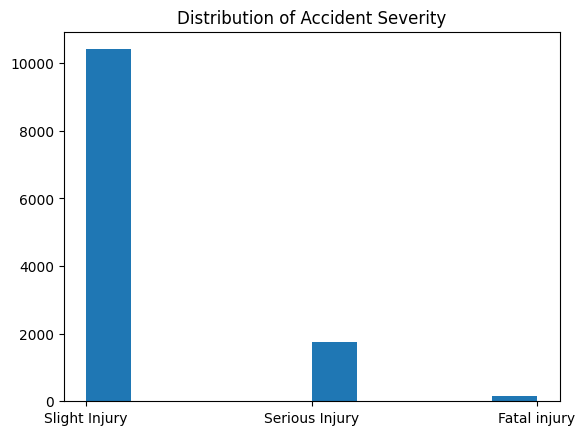

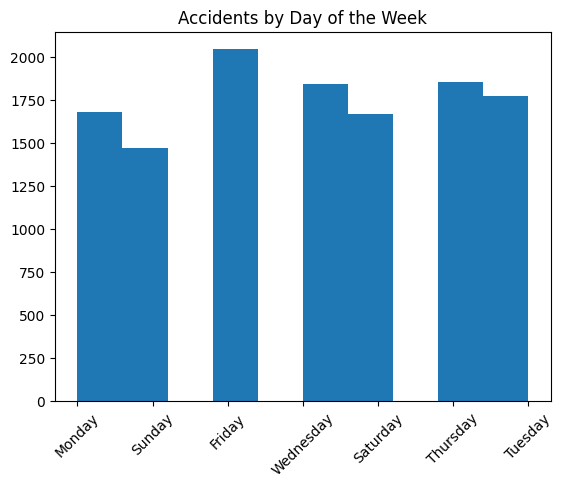

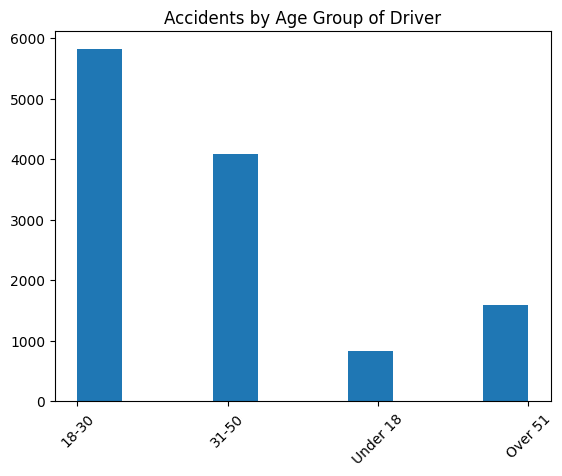

In [510]:
plt.hist(x='Accident_severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()

plt.hist(x='Day_of_week', data=df)
plt.title('Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.show()

plt.hist(x='Age_band_of_driver', data=df)
plt.title('Accidents by Age Group of Driver')
plt.xticks(rotation=45)
plt.show()


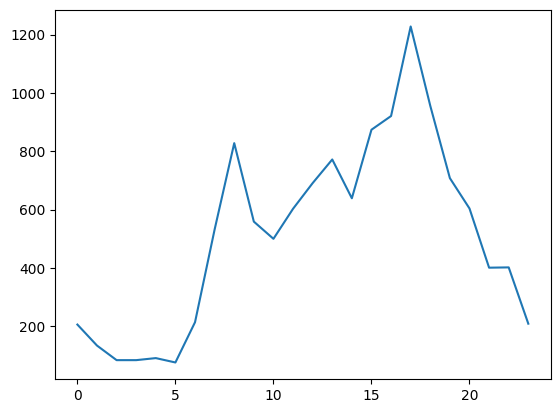

In [511]:
df['Hour'] = df['Time'].dt.hour
hourly_accidents = df.groupby('Hour')['Accident_severity'].count()
plt.plot(hourly_accidents.index, hourly_accidents.values)
plt.show()


### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

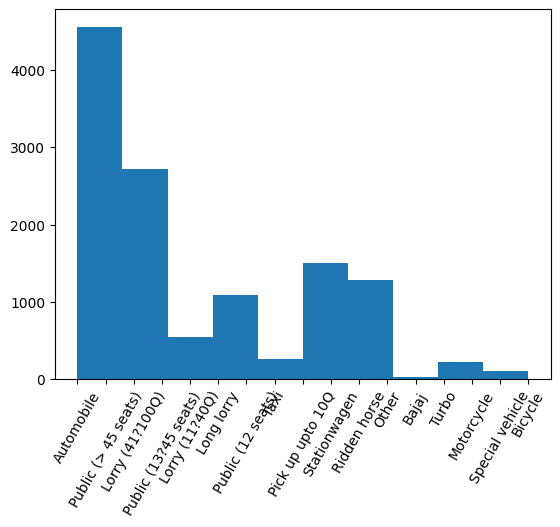

In [512]:
plt.hist(x='Type_of_vehicle', data=df)
plt.xticks(rotation=60)
plt.show()

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


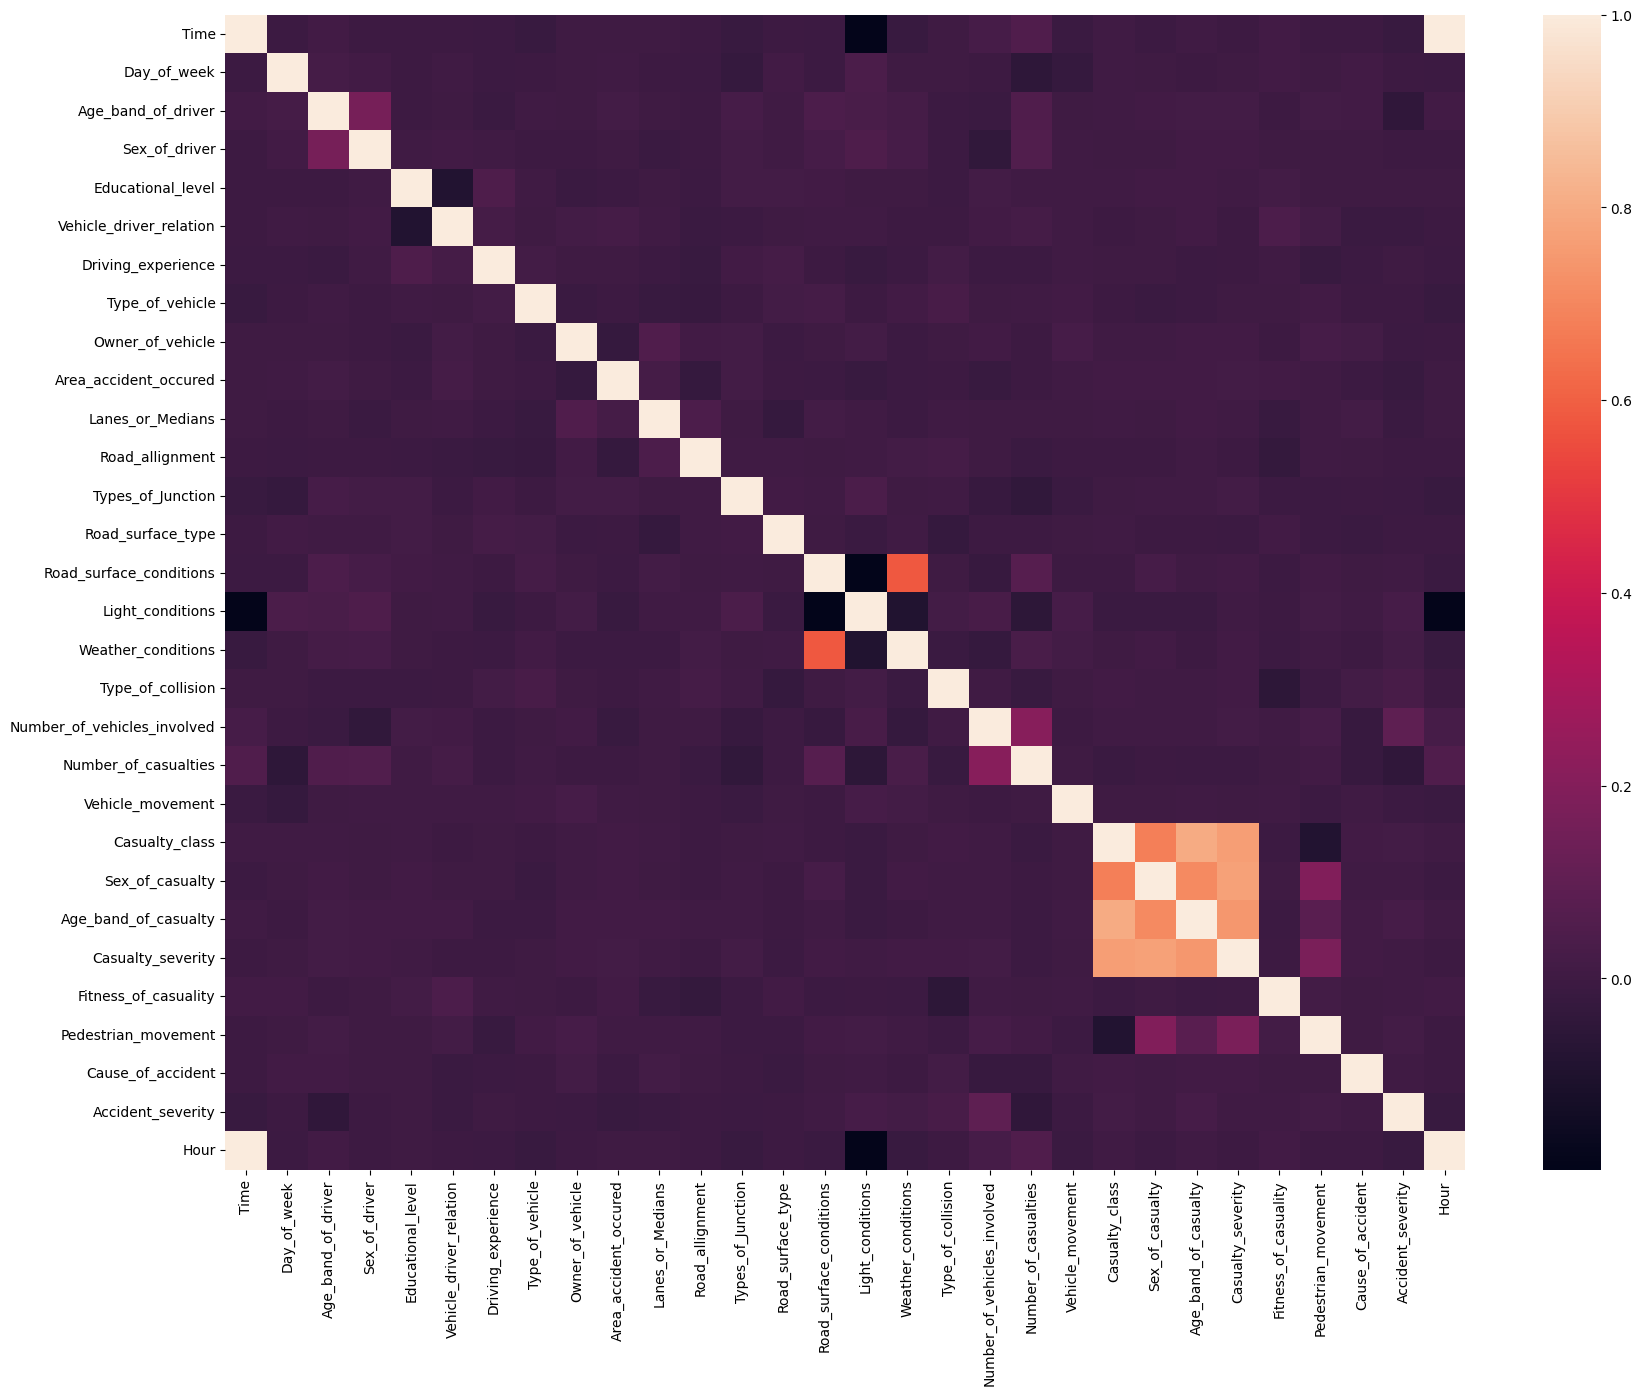

In [513]:
from sklearn.preprocessing import LabelEncoder
df2 =df.copy()
le = LabelEncoder()
for col in df.columns:
  if df2[col].dtype == 'object':
    df2[col] = le.fit_transform(df2[col])

plt.figure(figsize=(20,15))
sns.heatmap(df2.corr())
plt.show()


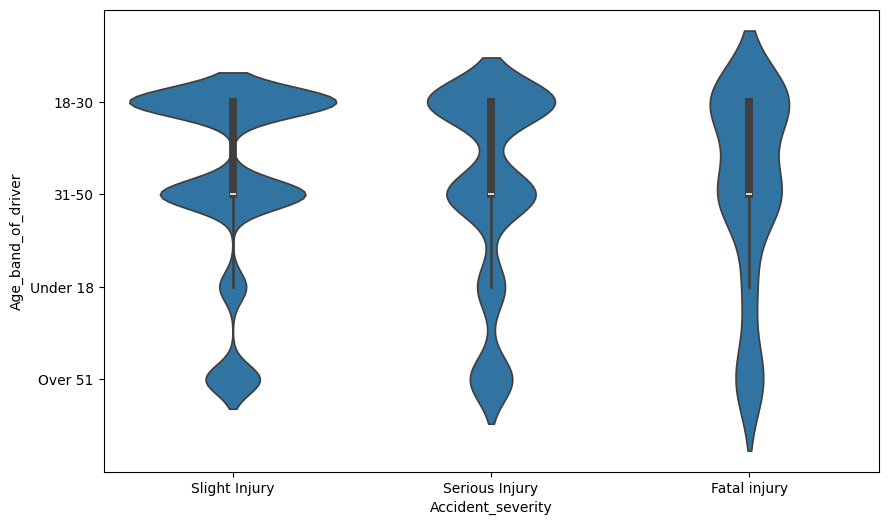

In [515]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Accident_severity', y='Age_band_of_driver', data=df)
plt.show()


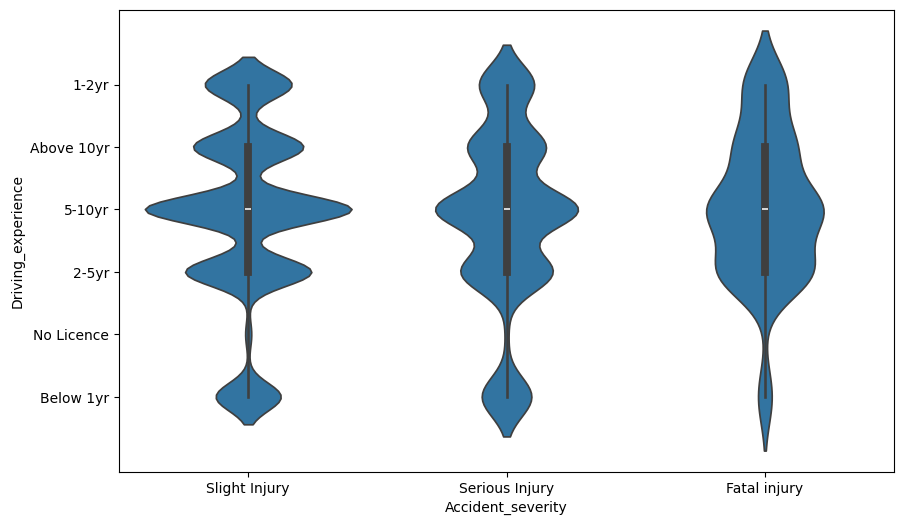

In [518]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Accident_severity', y='Driving_experience', data=df)
plt.show()


## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

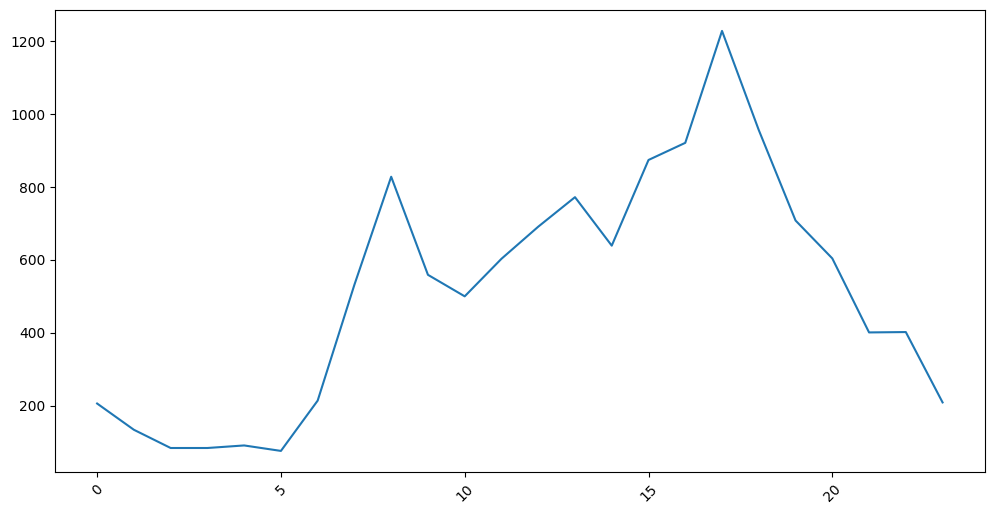

In [537]:
daily_accidents = df.groupby(df['Time'].dt.hour)['Accident_severity'].count()
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents.index, daily_accidents.values)
plt.xticks(rotation=45)
plt.show()


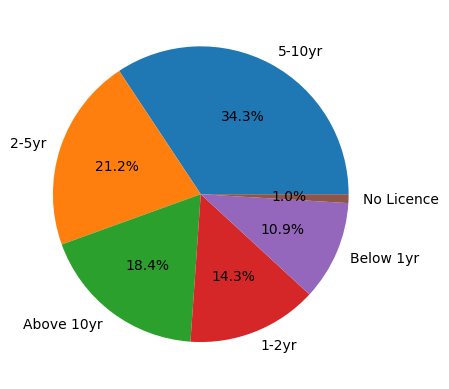

In [522]:
driving_experience_counts = df['Driving_experience'].value_counts()
plt.pie(driving_experience_counts.values, labels=driving_experience_counts.index, autopct='%1.1f%%')
plt.show()


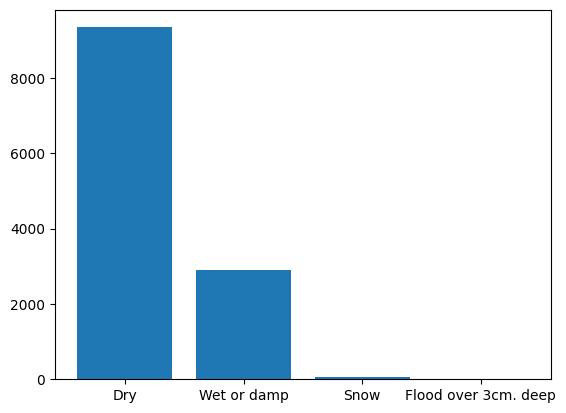

In [526]:
road_surface = df['Road_surface_conditions'].value_counts()
plt.bar(road_surface.index, road_surface.values)
plt.show()

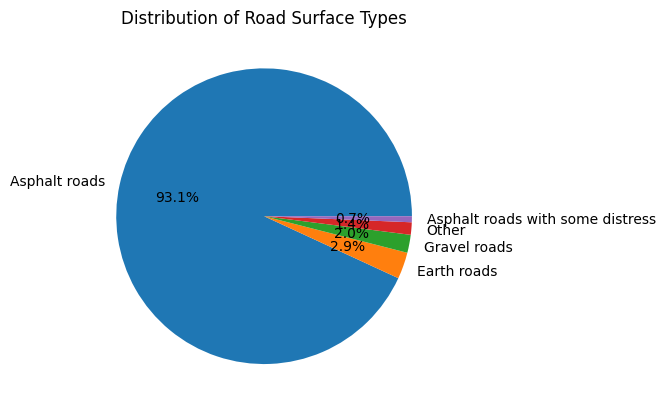

In [527]:
road_surface_type_counts = df['Road_surface_type'].value_counts()
plt.pie(road_surface_type_counts.values, labels=road_surface_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Road Surface Types')
plt.show()

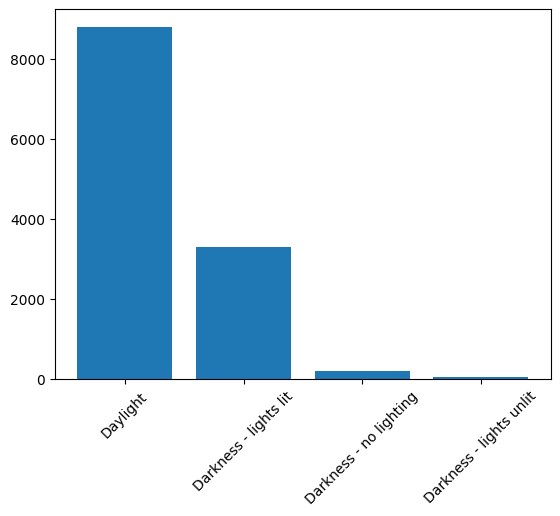

In [532]:
light_conditions_counts = df['Light_conditions'].value_counts()
plt.bar(light_conditions_counts.index, light_conditions_counts.values)
plt.xticks(rotation=45)
plt.show()

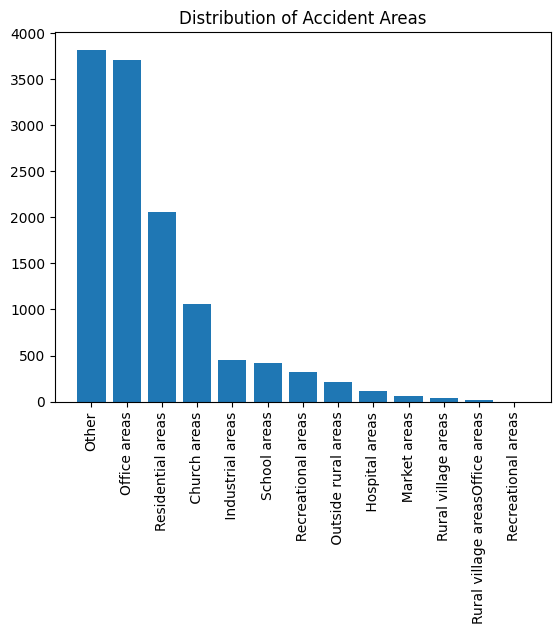

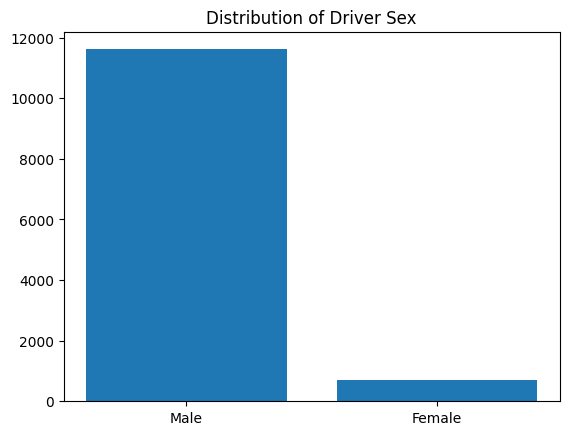

In [538]:
area_counts = df['Area_accident_occured'].value_counts()
plt.bar(area_counts.index, area_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Accident Areas')
plt.show()

sex_of_driver_counts = df['Sex_of_driver'].value_counts()
plt.bar(sex_of_driver_counts.index, sex_of_driver_counts.values)
plt.title('Distribution of Driver Sex')
plt.show()


## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [514]:

# **Key Insights and conclusion**

# 1. Accident Severity: Most accidents are classified as Slight
# 2. Time of Day: Accidents peak hours of the day are afternoon
# 3. Age and Driving Experience: Younger and less experienced drivers have big number of accidents.
# 4. Road Surface and Lighting: Certain road surface conditions and lighting conditions are associated with increase of accedents.
# 5. Gender: Males have the higher number of accidents
# 6. Area: the Office areas are found to be an area that gets alot of accidents.

